In [13]:
%matplotlib inline
import json
qs=json.load(file("../data/4b/BioASQ-trainingDataset4b.json"))

In [11]:
qs.keys()

[u'questions']

In [14]:
import matplotlib
matplotlib.style.use('ggplot')

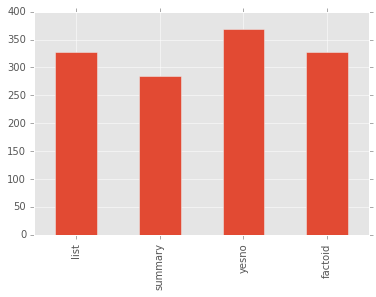

In [128]:
# Number of questions of each type
import pandas as pd
from collections import Counter
types=[q["type"] for q in qs["questions"]]
df=pd.Series(types).value_counts(sort=False).plot.bar()

In [34]:
from collections import defaultdict
by_type=defaultdict(lambda:[])
for q in qs["questions"]:
    by_type[q["type"]].append(q)

Yes/No questions
----------------

In [50]:
# The yes/no answers are not perfectly standardized
errors=[q for q in by_type["yesno"] if q["exact_answer"] not in ["yes","no"]]
len(errors)

20

In [60]:
# Capitalization varies but 2 examples even have a period in them
errors=[q for q in by_type["yesno"] if q["exact_answer"].lower() not in ["yes","no"]]
[q["exact_answer"] for q in errors]

[u'Yes.', u'No.']

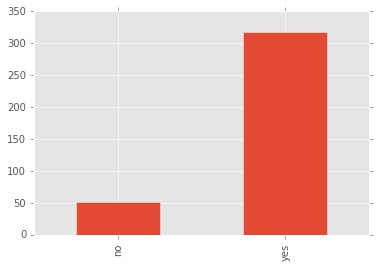

In [55]:
# Sorry seems to be the hardest word and Yes the right answer
yesno=[q["exact_answer"].lower().strip(".") for q in by_type["yesno"]]
count=Counter(yesno)
pd.Series(count).plot.bar()

In [63]:
total=(count["yes"]+count["no"])
print count, "=", total

Counter({u'yes': 317, u'no': 51}) = 368


In [64]:
count["yes"]/float(total)

0.8614130434782609

Factoid questions
----------------

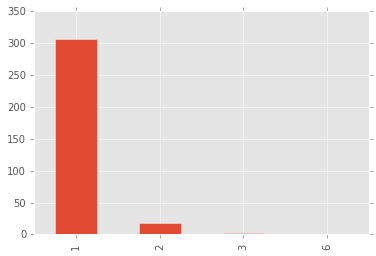

In [70]:
# Factoid questions answer length. Most factoid questions have a single element to return
lengths=[len(q["exact_answer"]) for q in by_type["factoid"]]
pd.Series(Counter(lengths)).plot.bar()

In [191]:
print by_type["factoid"][0]['body']
print by_type["factoid"][0]['exact_answer']

Which is the main CHEK2 genetic variant, thought to be involved in familial breast cancer?
[[u'CHEK2 1100delC mutation']]


List questions
----------------

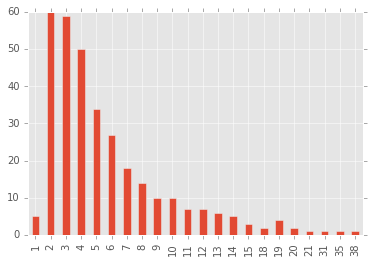

In [87]:
# List questions answer length in separate items (includes lists of items). 
lengths=[len(q["exact_answer"]) for q in by_type["list"]]
pd.Series(lengths).value_counts(sort=False).plot.bar()

In [184]:
def list_question_length(q):
    l=0
    ans=q["exact_answer"] 
    if isinstance(ans, basestring):
        ans=[ans]
    for e in ans:
        if not isinstance(e,list):
            e=[e]
        for e2 in e:
            if isinstance(e2,list):
                e2=" ".join(e2)
            l+=len(e2.split())
    return l

In [185]:
# List questions answer length in tokens varies a lot
token_lengths=[list_question_length(q) for q in by_type["list"]]
                
df=pd.Series(token_lengths)
df.describe()

count    327.000000
mean      13.700306
std       15.271634
min        2.000000
25%        5.000000
50%       10.000000
75%       16.500000
max      175.000000
dtype: float64

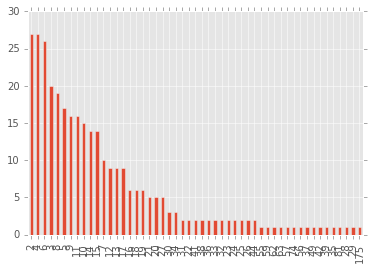

In [186]:
# Distribution is very skewed towards fewer tokens but there are some list answers with a lot of tokens in the answer
df.value_counts().plot.bar()

In [151]:
# Unusually long answer
for q in by_type["list"]:
    if list_question_length(q) > 170:
        print q["exact_answer"]

[[u"Use of a Multidrug Pill In Reducing cardiovascular Events' (UMPIRE) trial, European Clinical Trials database\\, as EudraCT: 2009-016278-34 and the Clinical Trials Registry\\, India as CTRI/2010/091/000250."], [u"IMProving Adherence using Combination Therapy (IMPACT)', Australian New Zealand Clinical Trial Registry (ACTRN12606000067572)"], [u'Kanyini Guidelines Adherence with the Polypill (Kanyini-GAP)'], [u'Phase II study of the Polycap, double-blind\\, randomised trial\\, registered with ClinicalTrials.gov\\, number NCT00443794', u'ndian Polycap Study, TIPS'], [u'Cluster Randomized Usual Care vs Caduet Investigation Assessing Long-term-risk (CRUCIAL trial)'], [u'GEMINI trial, 14-week\\, open-label trial conducted in 1220 patients from the USA'], [u'GEMINI-Australia, Asia\\, Latin America\\, Africa/Middle East (AALA) study'], [u'JEWEL 1 conducted among 1138 patients from the UK and Canada'], [u'JEWEL 2 conducted in 1107 patients from Europe'], [u'CAPABLE54, the Clinical Utility of 

In [182]:
# Standard length answers
for q in by_type["list"]:
    if list_question_length(q) < 5:
        print q["exact_answer"]

[[u'diuretic'], [u'hypertension']]
[[u'T68'], [u'S19'], [u'S33/35']]
[[u'sagittal'], [u'lambdoid']]
[[u'icatibant'], [u'ecallantide']]
[[u'schizophrenia'], [u'major depressive disorder']]
[[u'PMP22'], [u'MPZ'], [u'SH3TC2']]
[[u'no associations found yet']]
[[u'Vemurafenib'], [u'Dabrafenib']]
[[u'fluorouracil'], [u'epirubicin'], [u'cyclophosphamide']]
[[u'radiotherapy'], [u'chemotherapy']]
[[u'everolimus'], [u'rapamycin']]
[[u'fludarabine'], [u'cytarabine'], [u'amsacrine']]
[[u'COL5A1'], [u'COL5A2']]
[[u'dexamethasone'], [u'cytarabine'], [u'cisplatin'], [u'rituximab']]
[[u'juvenile hemochromatosis']]
[[u'Gata4'], [u'Mef2c'], [u'Tbx5']]
[[u'istradefylline'], [u'preladenant']]
[[u'orexin 1'], [u'orexin 2']]
[[u'hypomyelination'], [u'hypodontia'], [u'hypogonadotropic hypogonadism']]
[[u'p65', u'RelA'], [u'p50', u'NF-\u03baB1']]
[[u'Notch-1'], [u'Notch-2'], [u'Notch-3'], [u'Notch-4']]
[[u'Ulcerative colitis'], [u"Crohn's disease"]]
[[u'prostate cancer'], [u'melanoma'], [u'angiosarcoma']]
[[

Summary questions
----------------

In [183]:
def summary_question_length(q):
    l=0
    ans=q["ideal_answer"] 
    if isinstance(ans, basestring):
        ans=[ans]
    for e in ans:
        if not isinstance(e,list):
            e=[e]
        for e2 in e:
            if isinstance(e2,list):
                e2=" ".join(e2)
            l+=len(e2.split())
    return l

In [160]:
# Summary questions ideal answer length 
lengths=pd.Series([summary_question_length(q) for q in by_type["summary"]])
lengths.describe()

count     285.000000
mean      108.494737
std       144.914439
min         2.000000
25%        32.000000
50%        58.000000
75%       123.000000
max      1002.000000
dtype: float64

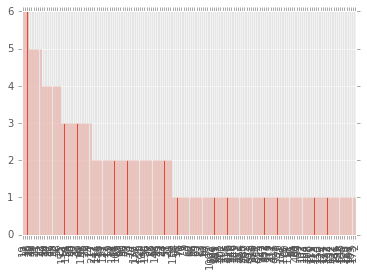

In [170]:
lengths.value_counts(sort=True).plot.bar()

In [172]:
#Unusually long summary

for q in by_type["summary"]:
    if summary_question_length(q) > 1000:
        print json.dumps(q["ideal_answer"], indent=2)

[u'An unusual feature of the Diptera is that homologous chromosomes are intimately synapsed in somatic cells. At a number of loci in Drosophila, this pairing can significantly influence gene expression. Such influences were first detected within the bithorax complex (BX-C) by E.B. Lewis, who coined the term transvection to describe them. Most cases of transvection involve the action of enhancers in trans. At several loci deletion of the promoter greatly increases this action in trans, suggesting that enhancers are normally tethered in cis by the promoter region. Transvection can also occur by the action of silencers in trans or by the spreading of position effect variegation from rearrangements having heterochromatic breakpoints to paired unrearranged chromosomes. Although not demonstrated, other cases of transvection may involve the production of joint RNAs by trans-splicing. Several cases of transvection require Zeste, a DNA-binding protein that is thought to facilitate homolog inter

In [178]:
#Unusually short summaries

for q in by_type["summary"]:
    if summary_question_length(q) < 10:
        print q["ideal_answer"]

[u'Odorant co-receptor.']
[u'TNF-alpha inhibits the T3-induced expression of thyroid hormone receptor-beta']
[u'Ranolazine inhibits Ca(2+)/calmodulin kinase II (CaMKII) activity']
[u'TRH improves myocardial contractility']


In [180]:
#Standard summaries
count=0
for q in by_type["summary"]:
    if 20 < summary_question_length(q) < 100 and count < 5:
        print q["ideal_answer"]
        count+=1

[u'Inn1 associates with the contractile actomyosin ring at the end of mitosis and is needed for cytokinesis. Inn1 has a C2 domain at the amino terminus of the protein that is required for ingression of the plasma membrane during cytokinesis in budding yeast, whereas the remainder of the protein recruits Inn1 to the actomyosin ring']
[u'Brain natriuretic peptide concentrations are elevated in patients with traumatic brain during the acute phase and correlate with poor outcomes. In traumatic brain injury patients higher brain natriuretic peptide concentrations are associated with more extensive SAH,  elevated ICP and hyponatremia. Brain natriuretic peptide may play an adaptive role in recovery through augmentation of cerebral blood flow.']
[u'lincRNA may function either as modulators of epigenetic mark deposition or as endogenous antagonists for microRNA binding. A lincRNA, linc-RoR, may function as a key competing endogenous RNA to link the network of miRNAs and core TFs, e.g., Oct4, So